<a href="https://colab.research.google.com/github/vikas1306v/CSGO-Weapon-Maps-TopPlayers-Stats-EDA/blob/main/PerformingEDAonCSdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Performing EDA on CSGO (GAME)**

*Uploading Locally store csv to google Colab*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weapons_statistics.csv to weapons_statistics (1).csv
Saving top_100_players.csv to top_100_players (1).csv
Saving maps_statistics.csv to maps_statistics (1).csv


*Importing Libraries*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

*Making the dataframe from csv's using pandas (READ_CSV() method)*

In [ ]:
# Read maps statistics
df_map = pd.read_csv('maps_statistics.csv')

# Read top 100 players statistics
df_top = pd.read_csv('top_100_players.csv')

# Read weapons statistics
df_weapon = pd.read_csv('weapons_statistics.csv')

*Head() method for seeing top 5 rows of each dataset*

In [ ]:
df_map.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7%,49.2%,50.8%,"168,288"
1,Mirage,23.9%,49.1%,50.9%,"150,883"
2,Inferno,13.1%,50.3%,49.7%,"82,737"
3,Nuke,4.3%,47.0%,53.0%,"27,211"
4,Vertigo,4.0%,47.8%,52.2%,"25,390"


In [ ]:
df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8%,59.4%,16.7%,"370,567"
1,M4A1-S,1.1,14.6%,60.3%,18.3%,"181,934"
2,AWP,1.6,14.5%,68.7%,10.1%,"164,754"
3,M4A1,1.2,18.0%,60.6%,15.5%,"104,012"
4,USP-S,0.9,21.2%,63.5%,10.5%,"94,958"


In [ ]:
df_top.head()

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,sH0oRuk YouTube,"31,203",Asia,278,9,98
1,2,TTpo100Razeb Daniel,"29,626",Europe,250,12,174
2,3,REZPEZTâ¢,"29,588",Europe,133,2,58
3,4,rAdek1ngâ,"29,548",South America,75,1,8
4,5,ð,"29,480",Asia,106,0,10


## **Working on Maps Dataset of CSGo**
   
   **Questions**

  *1->* **Win** percentages for **both Terrorist (T) and Counter-Terrorist (CT)** sides on **each map** .


  *2->* Which **map** is **played most** in terms of **matches** .

  *3->* Which **map** is **played most** in terms of **play rate**

  *4->* **Name the five map** whose T win % > CT win % **still play rate % is lesser**


In [ ]:
df_map.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7%,49.2%,50.8%,"168,288"
1,Mirage,23.9%,49.1%,50.9%,"150,883"
2,Inferno,13.1%,50.3%,49.7%,"82,737"
3,Nuke,4.3%,47.0%,53.0%,"27,211"
4,Vertigo,4.0%,47.8%,52.2%,"25,390"


In [ ]:
df_map.info()
# by this command we come to know that there is no any null value present in our dataset

# But the type of CT win % ,T win % and Matches are of Object -->we have to convert it to float
      # for numerical calculation

df_map['Play Rate']=df_map['Play Rate'].str.replace('%','').astype(float)
df_map['CT-Win %']=df_map['CT-Win %'].str.replace('%','').astype(float)
df_map['T-Win %']=df_map['T-Win %'].str.replace('%','').astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Map        10 non-null     object 
 1   Play Rate  10 non-null     object 
 2   T-Win %    10 non-null     object 
 3   CT-Win %   10 non-null     object 
 4   Matches    10 non-null     float64
dtypes: float64(1), object(4)
memory usage: 528.0+ bytes


In [ ]:
# Matches Column will contain Commas(,) we have to replace these commas with point(.) to make it float
df_map['Matches'] = df_map['Matches'].str.replace(',', '').astype(float)

In [ ]:
df_map.describe()

,Matches
count,10.000000
mean,50389.100000
std,62103.374039
min,1883.000000
25%,8331.750000
50%,24931.500000
75%,68855.500000
max,168288.000000


*Answer 1*

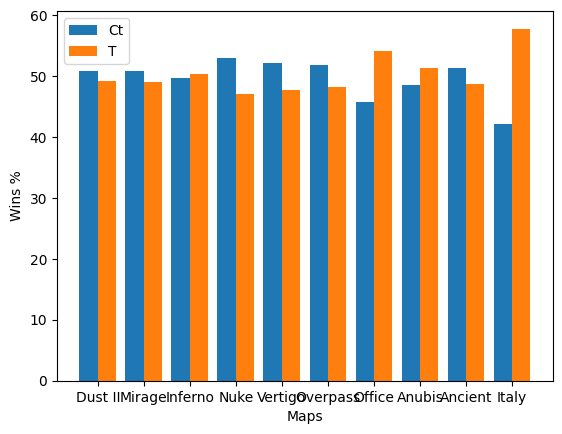

In [ ]:
# For this answer we can either use Stack bar graph or Double bar ghraph(Choice is yours)

X =df_map.Map  # lables
Y =df_map['CT-Win %']  # array of CT win % values
Z =df_map['T-Win %'] # array of T win % values
X_axis = np.arange(len(X))

# plotting double bar graph
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Ct')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'T')
plt.xticks(X_axis, X)
plt.xlabel("Maps")
plt.ylabel("Wins %")
plt.legend()
plt.show()


# WE CAN SAY THAT ITALY MAP HAS HIGHEST T WIN %

*Answer 2*

In [ ]:
# this is an array which contain number of matches in particular map
matches_number_array=df_map['Matches']
matches_number_labels=df_map['Map']

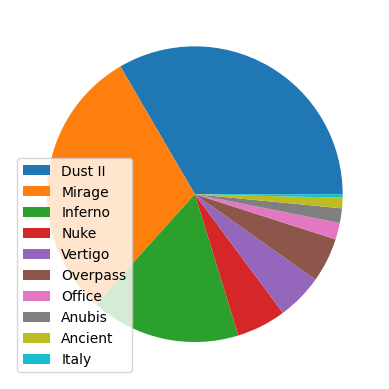

In [ ]:
plt.pie(matches_number_array)
# in pie method we can set labels also but it looks messy so i explicity set
# legend
plt.legend(matches_number_labels)
plt.show()

# so answer id Dust2 most palyed

*Answer 3*

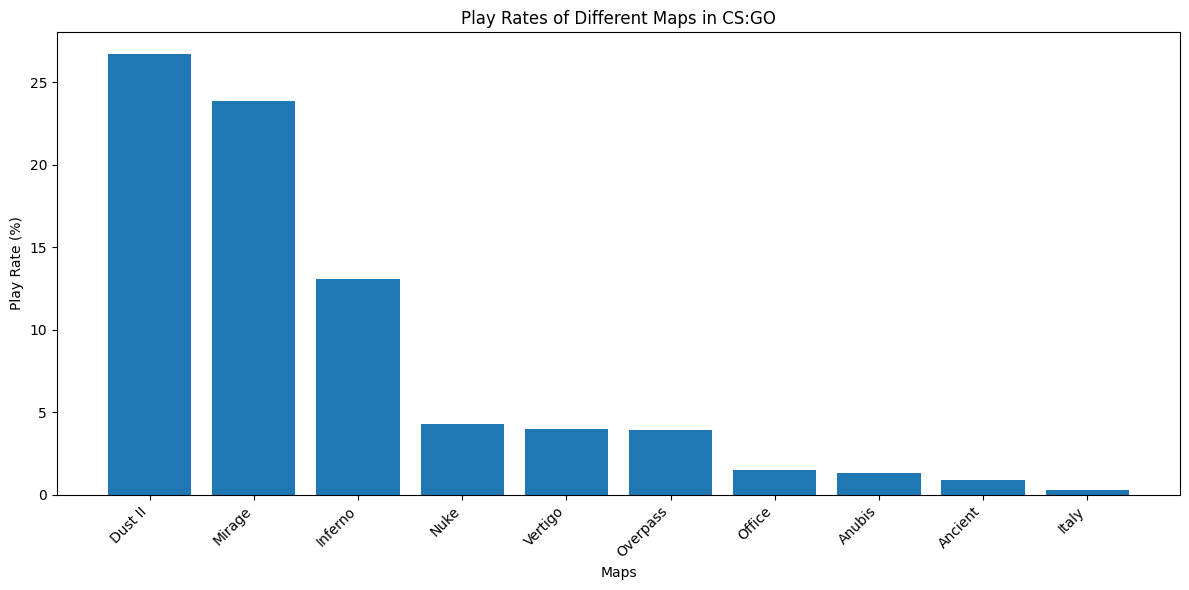

In [ ]:
# firstly sort the values on basis of Play Rate  %
df_map_play = df_map.sort_values(by='Play Rate' ,ascending=False)

plt.figure(figsize = (12,6))
plt.bar(df_map.Map,df_map_play['Play Rate'])
plt.xlabel('Maps')
plt.ylabel('Play Rate (%)')
plt.title('Play Rates of Different Maps in CS:GO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# By this graph we come to know that Dust 2 has highest Play Rate%

*Answer 4*

In [ ]:
most_played_maps = df_map.nlargest(5, 'Play Rate')

# Calculate the average play rate
average_play_rate = most_played_maps['Play Rate'].mean()

# Filter maps where T win % > CT win % and play rate % is lesser than the average play rate of most played maps
filtered_maps = df_map[(df_map['T-Win %'] > df_map['CT-Win %']) & (df_map['Play Rate'] < average_play_rate)]

# Select the top five maps based on play rate %
top_five_maps = filtered_maps.nsmallest(5, 'Play Rate')

# Extract the names of the top five maps
top_five_map_names = top_five_maps['Map']
top_five_map_names

9      Italy
7     Anubis
6     Office
2    Inferno
Name: Map, dtype: object

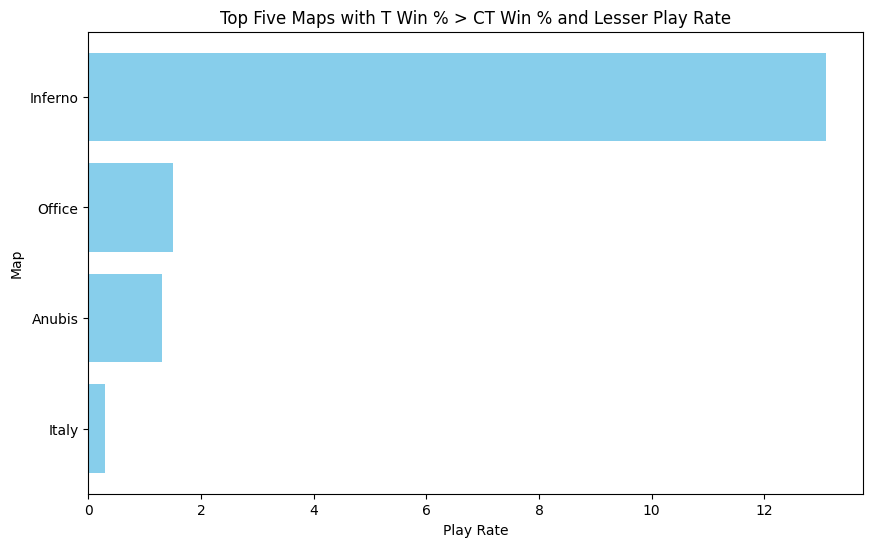

In [ ]:
top_five_maps_sorted = top_five_maps.sort_values(by='Play Rate', ascending=True)

# Plotting the play rate % of the top five maps
plt.figure(figsize=(10, 6))
plt.barh(top_five_maps_sorted['Map'], top_five_maps_sorted['Play Rate'], color='skyblue')
plt.xlabel('Play Rate')
plt.ylabel('Map')
plt.title('Top Five Maps with T Win % > CT Win % and Lesser Play Rate')
plt.show()

# by this graph --> Inferno is the map in which T Win % > CT Win % but most less played

## **Exploring Top 100 players Dataset**
   
   **Questions**

  *1->* Number of players in a **region** (finding out which region have maximum number of players) .


  *2->* Name the player who **Wins** most matches( And its all information like region , cs rating )

  *3->* Name the player who **Loss** most matches( And its all information like region , cs rating )

  *4->* Player With **Rank 1** exploring its data

  *5->* **Summarizing** data according to region

  *6->* **Total number of matches played** by players



In [ ]:
df_top.info()
# by this there is no any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           100 non-null    int64 
 1   Name           100 non-null    object
 2   CS Rating      100 non-null    int64 
 3   Region         100 non-null    object
 4   Wins           100 non-null    int64 
 5   Ties           100 non-null    int64 
 6   Losses         100 non-null    int64 
 7   Total_Matches  100 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 6.4+ KB


In [ ]:
df_top['CS Rating'] = df_top['CS Rating'].str.replace(',', '').astype(int)

In [ ]:
df_top.head()

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,sH0oRuk YouTube,31203,Asia,278,9,98
1,2,TTpo100Razeb Daniel,29626,Europe,250,12,174
2,3,REZPEZTâ¢,29588,Europe,133,2,58
3,4,rAdek1ngâ,29548,South America,75,1,8
4,5,ð,29480,Asia,106,0,10


*Answer 1*

In [ ]:

count_by_region=df_top.groupby('Region').size()

#this list contain Name of region with its count
 ##alternate of this group by
    #count_by_region=df_top['Region'].value_counts()
    #count_by_region.plot(kind='bar')

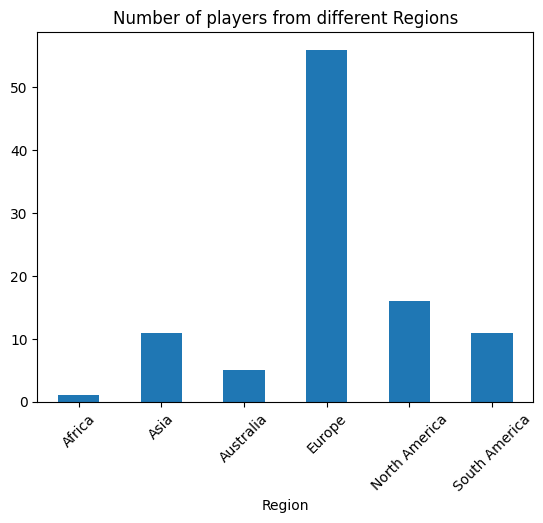

In [ ]:
plt.title('Number of players from different Regions')
count_by_region.plot(kind='bar')
# this rotation is apllied for more interactive reading
plt.xticks(rotation=45)
plt.show()


# with help of this graph we come to know that
  #Europe region has maximum number of players
  #And Africa has minimum

*Answer 2*

In [ ]:

# idxmax() function will return index of row which contain maximum value (Column wise)
top_wins=df_top.loc[df_top['Wins'].idxmax()] # this line will return whole row of player who win most matches

# and we are only interested in name
print("Player who won most matches is",top_wins.Name)
# and his rating is
print("With rating of",top_wins[2])

#Number of total wins
print("Total wins",top_wins.Wins)

# It is belonging to
print("Belongs to",top_wins.Region + " Region")
top_wins

Player who won most matches is strashno?è±å
With rating of 27439
Total wins 376
Belongs to Asia Region


Rank                      69
Name         strashno?è±å
CS Rating              27439
Region                  Asia
Wins                     376
Ties                      14
Losses                   305
Name: 68, dtype: object

`Answer 3`

In [ ]:

# idxmax() function will return index of row which contain maximum value (Column wise)
top_loss=df_top.loc[df_top['Losses'].idxmax()] # this line will return whole row of player who win most matches

# and we are only interested in name
print("Player who losses most matches is",top_loss.Name)
# and his rating is
print("With rating of",top_loss[2])

#Number of total losses
print("Total wins",top_wins.Losses)

# It is belonging to
print("Belongs to",top_loss.Region + " Region")


Player who losses most matches is strashno?è±å
With rating of 27439
Total wins 305
Belongs to Asia Region


Answer 4

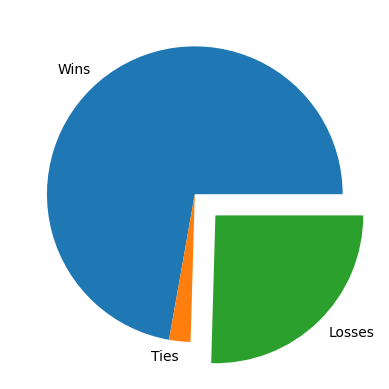

In [ ]:
# as top palyer is present at 0 index
top_ranking_player=df_top.iloc[0]

#visualizing it
value_array=[top_ranking_player.Wins,top_ranking_player.Ties,top_ranking_player.Losses]
labels_top_player=['Wins','Ties','Losses']
myexplode = [0,0,0.2]
plt.pie(value_array,labels=labels_top_player,explode=myexplode)
plt.show()


# By this answer we come to know that it has less number of wins as compared to player who wins most matches,
    # so we can say that Rank is not only dependent on Wins

*Answer 5*

In [ ]:
# we are summarizing the win, ties and losses on the basis of region

df_region_stats = df_top.groupby('Region').agg({
    'CS Rating': 'mean',
    'Wins': 'sum',
    'Ties': 'sum',
    'Losses': 'sum'
}).reset_index()
df_region_stats = df_region_stats.sort_values(by='CS Rating', ascending=False)

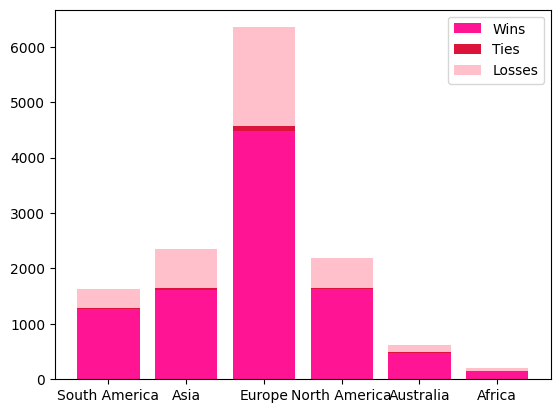

In [ ]:
# The best way of visualizing is of using stack bar graph
x=df_region_stats.Region
y1=df_region_stats.Wins
y2=df_region_stats.Ties
y3=df_region_stats.Losses
plt.bar(x, y1, color='deeppink')
plt.bar(x, y2, bottom=y1, color='crimson')
plt.bar(x, y3, bottom=y1+y2, color='pink')
plt.legend(['Wins','Ties','Losses'])
plt.show()

*Answer 6*

In [ ]:
# as we haven't column which have total number of matches played by player

#so we add wins + Ties + losses
df_top['Total_Matches']=df_top['Wins']+df_top['Ties']+df_top['Losses']

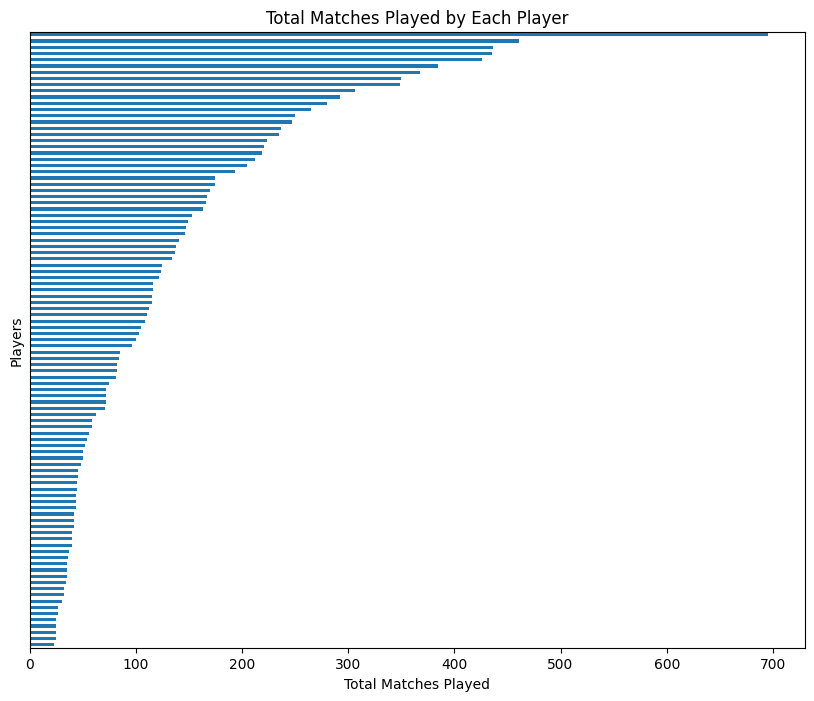

In [ ]:

total_matches_by_player = df_top.groupby('Name')['Total_Matches'].sum()
sorted_players = total_matches_by_player.sort_values(ascending=True)

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
sorted_players.plot(kind='barh')
plt.title('Total Matches Played by Each Player')
plt.xlabel('Total Matches Played')
plt.ylabel('Players')

# as it loosk messy so we remove y labels
plt.yticks([])
plt.show()

## **Exploring Weapons Dataset Of CSGo**
   
   **Questions**

  *1->* **Top 10 weapons** with most **kills** .


  *2->* **Top 5 weapon** which was **given most headshot**

  *3->* **Name the weapon whose hs%**  is max .What is its **position number on basis of total kills**



In [ ]:
df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8%,59.4%,16.7%,"370,567"
1,M4A1-S,1.1,14.6%,60.3%,18.3%,"181,934"
2,AWP,1.6,14.5%,68.7%,10.1%,"164,754"
3,M4A1,1.2,18.0%,60.6%,15.5%,"104,012"
4,USP-S,0.9,21.2%,63.5%,10.5%,"94,958"


In [ ]:
df_weapon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weapon       20 non-null     object 
 1   KPR          20 non-null     float64
 2   HS %         20 non-null     object 
 3   Chest %      20 non-null     object 
 4   Leg %        20 non-null     object 
 5   Total Kills  20 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.1+ KB


In [ ]:
df_weapon['HS %'] = df_weapon['HS %'].str.rstrip('%').astype('float')
df_weapon['Chest %'] = df_weapon['Chest %'].str.rstrip('%').astype('float')
df_weapon['Leg %'] = df_weapon['Leg %'].str.rstrip('%').astype('float')
df_weapon['Total Kills'] = df_weapon['Total Kills'].str.replace(',', '').astype(int)

df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8,59.4,16.7,370567
1,M4A1-S,1.1,14.6,60.3,18.3,181934
2,AWP,1.6,14.5,68.7,10.1,164754
3,M4A1,1.2,18.0,60.6,15.5,104012
4,USP-S,0.9,21.2,63.5,10.5,94958


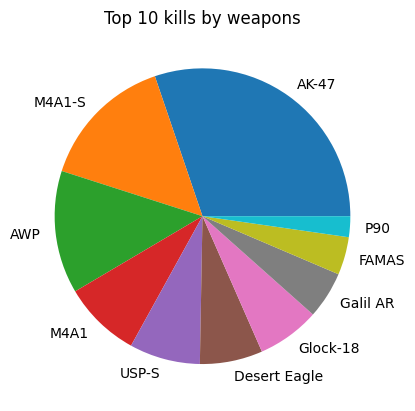

In [ ]:
plt.pie(x = df_weapon['Total Kills'][0:10], labels =df_weapon['Weapon'][0:10])
plt.title('Top 10 kills by weapons')
plt.show()

*Answer 2*

In [ ]:
df_weapon_hs = df_weapon.sort_values(by = 'HS %', ascending = False)
df_weapon_hs

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
5,Desert Eagle,0.9,28.5,58.7,9.0,84197
4,USP-S,0.9,21.2,63.5,10.5,94958
8,FAMAS,1.0,18.9,58.7,16.9,50834
15,P250,0.7,18.2,63.3,13.0,12575
7,Galil AR,1.1,18.1,57.6,18.4,63215
3,M4A1,1.2,18.0,60.6,15.5,104012
0,AK-47,1.2,17.8,59.4,16.7,370567
6,Glock-18,0.9,17.8,65.5,11.8,83899
18,G3SG1,1.9,15.1,61.3,15.5,9289
16,Tec-9,0.8,14.9,63.2,15.6,11796


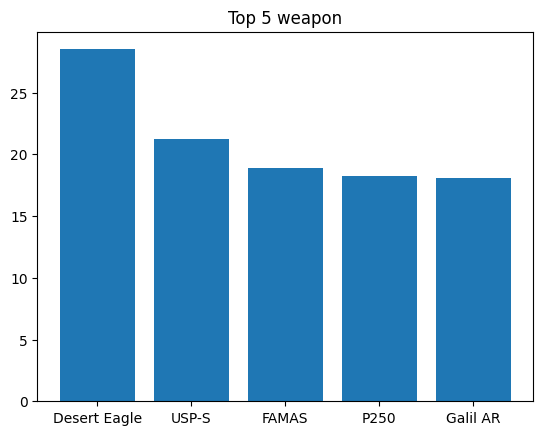

In [ ]:
top_5 = df_weapon_hs['Weapon'][0:5]
plt.bar(top_5,df_weapon_hs['HS %'][0:5])
plt.title('Top 5 weapon')
plt.show()

*Answer 3*

In [64]:
# Find the index of the weapon with the maximum headshot percentage (HS %)
max_hs_index = df_weapon['HS %'].idxmax()

# Retrieve the weapon name with the maximum headshot percentage
weapon_with_max_hs = df_weapon.loc[max_hs_index, 'Weapon']

# Find the position number of the weapon based on total kills
position_number = df_weapon[df_weapon['Weapon'] == weapon_with_max_hs]['Total Kills'].index[0] + 1

print("Weapon with the maximum HS %:", weapon_with_max_hs)
print("Position number based on total kills:", position_number)

Weapon with the maximum HS %: Desert Eagle
Position number based on total kills: 6
